#Importando Bibliotecas e Lendo arquivo

In [1]:
!pip install -U plotly
#Requirement already satisfied: plotly in /usr/local/lib/python3.7/dist-packages (5.3.1)
#Requirement already satisfied: six in /usr/local/lib/python3.7/dist-packages (from plotly) (1.15.0)
#Requirement already satisfied: tenacity>=6.2.0 in /usr/local/lib/python3.7/dist-packages (from plotly) (8.0.1)

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [3]:
df = pd.read_csv("historico_regiao_sudeste.csv")
df

,Unnamed: 0,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,-,-,-,-,-,530,886,1517,2656,1550,528,148,7815
1,1999,76,169,99,321,574,669,1025,2552,3853,2177,696,79,12290
2,2000,65,51,52,156,374,763,1153,1745,1691,2714,144,40,8948
3,2001,45,72,50,125,306,532,873,1603,2118,1022,237,99,7082
4,2002,50,86,178,287,426,800,1601,3378,4458,5842,658,393,18157
5,2003,128,396,298,485,802,2053,2676,3680,9093,6317,780,402,27110
6,2004,88,141,254,295,469,808,1425,3059,6807,3403,1412,418,18579
7,2005,96,247,313,462,663,792,1473,2954,2669,7661,775,315,18420
8,2006,306,290,329,460,1038,1294,2646,3456,4263,1100,376,244,15802
9,2007,161,304,591,437,917,1575,2056,4861,8093,6948,2633,540,29116


#Tratamento do dataframe

In [4]:
df.drop([0 ,1,23,24,25,26], axis=0,inplace=True)
#Foram retirados as linhas dos anos 1998, 1999 e 2021 os quais não são objeto de estudo.
#Foram retiradas também as linhas com os dados de média, máximo e mínimo, pois, a análise será feita diretamente do Dataframe utilizando o Pandas.

In [5]:
#Criado uma nova coluna para o dado dos anos.
df["Ano"]= df["Unnamed: 0"]
df.drop("Unnamed: 0", axis=1,inplace=True)
df.set_index("Ano")

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
Ano,,,,,,,,,,,,,
2000,65,51,52,156,374,763,1153,1745,1691,2714,144,40,8948
2001,45,72,50,125,306,532,873,1603,2118,1022,237,99,7082
2002,50,86,178,287,426,800,1601,3378,4458,5842,658,393,18157
2003,128,396,298,485,802,2053,2676,3680,9093,6317,780,402,27110
2004,88,141,254,295,469,808,1425,3059,6807,3403,1412,418,18579
2005,96,247,313,462,663,792,1473,2954,2669,7661,775,315,18420
2006,306,290,329,460,1038,1294,2646,3456,4263,1100,376,244,15802
2007,161,304,591,437,917,1575,2056,4861,8093,6948,2633,540,29116
2008,168,144,234,312,609,515,1518,2128,3626,4594,1533,305,15686


In [6]:
#Verificanto o tipo dos dados colunares.
df.dtypes

Janeiro      object
Fevereiro    object
Março        object
Abril        object
Maio         object
Junho         int64
Julho         int64
Agosto        int64
Setembro      int64
Outubro       int64
Novembro     object
Dezembro     object
Total         int64
Ano          object
dtype: object

In [7]:
#Fazendo uma mudança do tipo dos dados colunáres para inteiro.
df.Janeiro = df.Janeiro.astype("int64")
df.Fevereiro = df.Fevereiro.astype("int64")
df.Março = df.Março.astype("int64")
df.Abril = df.Abril.astype("int64")
df.Maio = df.Maio.astype("int64")
df.Novembro = df.Novembro.astype("int64")
df.Dezembro = df.Dezembro.astype("int64")

#FAZER A MUDAÇA DOS DADOS DE ANO PARA DATA??
df.Ano = df.Ano.astype("int64")

In [8]:
#Novos tipos dos dados colunáres.
df.dtypes

Janeiro      int64
Fevereiro    int64
Março        int64
Abril        int64
Maio         int64
Junho        int64
Julho        int64
Agosto       int64
Setembro     int64
Outubro      int64
Novembro     int64
Dezembro     int64
Total        int64
Ano          int64
dtype: object

#Criando um Dataframe transposto para facilitar a criação de alguns graficos e algumas análises

In [9]:
df_transposta = df.T
colunas = df_transposta.loc['Ano'].to_list()
df_transposta.columns = colunas
df_transposta.drop(['Total','Ano'], inplace=True)
df_transposta
#da pra usar esse dataframe para fazer os gráficos de Meses X N° de focos

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Janeiro,65,45,50,128,88,96,306,161,168,122,249,202,145,163,233,372,131,146,113,293,166
Fevereiro,51,72,86,396,141,247,290,304,144,207,481,302,286,297,338,193,259,173,87,199,238
Março,52,50,178,298,254,313,329,591,234,258,283,137,369,217,160,145,262,192,245,237,221
Abril,156,125,287,485,295,462,460,437,312,274,311,185,403,275,255,188,548,122,150,184,353
Maio,374,306,426,802,469,663,1038,917,609,467,534,440,323,379,414,199,382,194,481,252,465
Junho,763,532,800,2053,808,792,1294,1575,515,509,1388,765,340,306,703,373,512,449,537,678,625
Julho,1153,873,1601,2676,1425,1473,2646,2056,1518,769,2097,1619,1043,844,1054,503,1885,1149,1742,1420,1258
Agosto,1745,1603,3378,3680,3059,2954,3456,4861,2128,1165,6472,3910,1533,1676,3452,1758,2697,2494,941,2303,2453
Setembro,1691,2118,4458,9093,6807,2669,4263,8093,3626,1684,7549,7760,4039,2354,4364,3247,2774,5484,2574,5084,6089
Outubro,2714,1022,5842,6317,3403,7661,1100,6948,4594,1267,2600,1645,4525,1359,5778,3960,1171,2698,916,2500,3533


In [10]:
#Verificação dos tipos da transposta
df_transposta.dtypes

2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
dtype: object

#Analise Estatistica dos dados

In [11]:
df.describe()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,163.904762,228.142857,239.285714,298.428571,482.571429,777.000000,1466.857143,2748.476190,4562.857143,3407.285714,681.238095,245.047619,15301.095238,2010.000000
std,86.116726,110.644153,114.866071,128.113844,219.888511,444.856943,576.401447,1313.677914,2255.729755,2123.503971,629.139564,128.171165,6009.984300,6.204837
min,45.000000,51.000000,50.000000,122.000000,194.000000,306.000000,503.000000,941.000000,1684.000000,916.000000,115.000000,40.000000,7082.000000,2000.000000
25%,113.000000,144.000000,178.000000,185.000000,374.000000,512.000000,1054.000000,1745.000000,2669.000000,1359.000000,301.000000,151.000000,10944.000000,2005.000000
50%,146.000000,238.000000,237.000000,287.000000,440.000000,678.000000,1425.000000,2494.000000,4263.000000,2714.000000,415.000000,204.000000,15686.000000,2010.000000
75%,202.000000,297.000000,283.000000,403.000000,534.000000,800.000000,1742.000000,3452.000000,6089.000000,4594.000000,780.000000,348.000000,18157.000000,2015.000000
max,372.000000,481.000000,591.000000,548.000000,1038.000000,2053.000000,2676.000000,6472.000000,9093.000000,7661.000000,2633.000000,540.000000,29116.000000,2020.000000


In [12]:
df_transposta.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,745.666667,590.166667,1513.083333,2259.166667,1548.25000,1535.000000,1316.833333,2426.333333,1307.166667,613.333333,1874.083333,1451.166667,1142.083333,703.500000,1450.000000,1065.000000,912.000000,1119.250000,674.750000,1200.583333,1329.500000
std,889.623652,684.274644,1954.867978,2831.153823,1994.52173,2144.420837,1380.717523,2733.414093,1472.829178,503.389842,2535.349768,2269.303010,1520.779014,715.346261,1939.807957,1304.425265,992.062406,1658.763018,774.324354,1478.846384,1834.089048
min,40.000000,45.000000,50.000000,128.000000,88.00000,96.000000,244.000000,161.000000,144.000000,122.000000,224.000000,124.000000,145.000000,163.000000,160.000000,145.000000,131.000000,99.000000,87.000000,177.000000,138.000000
25%,61.750000,92.250000,259.750000,400.500000,284.75000,314.500000,323.250000,514.250000,287.250000,245.250000,296.500000,197.750000,335.750000,260.500000,249.500000,197.500000,237.250000,166.250000,141.250000,227.500000,233.750000
50%,265.000000,271.500000,542.000000,791.000000,638.50000,719.000000,749.000000,1246.000000,562.000000,456.000000,507.500000,382.500000,360.000000,342.500000,429.500000,372.500000,447.000000,212.500000,363.000000,485.500000,440.000000
75%,1287.500000,910.250000,2045.250000,2927.000000,1833.50000,1772.000000,1632.000000,3190.000000,1681.750000,868.000000,2222.750000,1625.500000,1165.500000,972.750000,1653.500000,1558.500000,1349.500000,1485.250000,922.250000,1640.750000,1556.750000
max,2714.000000,2118.000000,5842.000000,9093.000000,6807.00000,7661.000000,4263.000000,8093.000000,4594.000000,1684.000000,7549.000000,7760.000000,4525.000000,2354.000000,5778.000000,3960.000000,2774.000000,5484.000000,2574.000000,5084.000000,6089.000000


In [13]:
#add coluna com médias anuais
df["Medias"]= df.Total/12

#Média anual de focos de queimadas
mediaAnual = df.Medias.mean()
desvioAnual = df.Medias.std()
print(mediaAnual)
print(desvioAnual)

1275.0912698412696
500.8320250293241


In [14]:
#Anos com número de focos mair que a média
print("A média anual foi: ", mediaAnual)
print("\nAbaixo estão os anos com número de focos maior que a média\n")
df[df.Medias>=mediaAnual]

A média anual foi:  1275.0912698412696

Abaixo estão os anos com número de focos maior que a média



,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
4,50,86,178,287,426,800,1601,3378,4458,5842,658,393,18157,2002,1513.083333
5,128,396,298,485,802,2053,2676,3680,9093,6317,780,402,27110,2003,2259.166667
6,88,141,254,295,469,808,1425,3059,6807,3403,1412,418,18579,2004,1548.250000
7,96,247,313,462,663,792,1473,2954,2669,7661,775,315,18420,2005,1535.000000
8,306,290,329,460,1038,1294,2646,3456,4263,1100,376,244,15802,2006,1316.833333
9,161,304,591,437,917,1575,2056,4861,8093,6948,2633,540,29116,2007,2426.333333
10,168,144,234,312,609,515,1518,2128,3626,4594,1533,305,15686,2008,1307.166667
12,249,481,283,311,534,1388,2097,6472,7549,2600,301,224,22489,2010,1874.083333
13,202,302,137,185,440,765,1619,3910,7760,1645,325,124,17414,2011,1451.166667
16,233,338,160,255,414,703,1054,3452,4364,5778,445,204,17400,2014,1450.000000


In [15]:
#Verificação do número de anos acima da média anual
df[df.Medias>=mediaAnual].shape

(11, 15)

In [16]:
#Anos com número de focos menor que a média
print("A média anual foi: ", mediaAnual)
print("\nAbaixo estão os anos com número de focos menor que a média\n")
df[df.Medias<=mediaAnual]

A média anual foi:  1275.0912698412696

Abaixo estão os anos com número de focos menor que a média



,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
2,65,51,52,156,374,763,1153,1745,1691,2714,144,40,8948,2000,745.666667
3,45,72,50,125,306,532,873,1603,2118,1022,237,99,7082,2001,590.166667
11,122,207,258,274,467,509,769,1165,1684,1267,445,193,7360,2009,613.333333
14,145,286,369,403,323,340,1043,1533,4039,4525,351,348,13705,2012,1142.083333
15,163,297,217,275,379,306,844,1676,2354,1359,386,186,8442,2013,703.500000
17,372,193,145,188,199,373,503,1758,3247,3960,1492,350,12780,2015,1065.000000
18,131,259,262,548,382,512,1885,2697,2774,1171,172,151,10944,2016,912.000000
19,146,173,192,122,194,449,1149,2494,5484,2698,231,99,13431,2017,1119.250000
20,113,87,245,150,481,537,1742,941,2574,916,115,196,8097,2018,674.750000
21,293,199,237,184,252,678,1420,2303,5084,2500,1080,177,14407,2019,1200.583333


In [17]:
#Verificação do número de anos abaixo da média anual
df[df.Medias<=mediaAnual].shape

(10, 15)

Maior número de focos de queimadas em um ano

In [18]:
maxAnual = df.Total.max()
df[df.Total == maxAnual]

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
9,161,304,591,437,917,1575,2056,4861,8093,6948,2633,540,29116,2007,2426.333333


Menor número de focos de queimadas em um ano

In [19]:
minAnual = df.Total.min()
df[df.Total == minAnual]

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
3,45,72,50,125,306,532,873,1603,2118,1022,237,99,7082,2001,590.166667


#Descretização por médias anuais

In [20]:
counts = pd.cut(df['Medias'], 5).value_counts()
counts

(1324.633, 1691.867]    6
(957.4, 1324.633]       6
(588.33, 957.4]         6
(2059.1, 2426.333]      2
(1691.867, 2059.1]      1
Name: Medias, dtype: int64

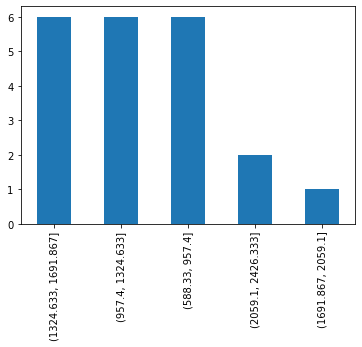

In [21]:
#Histograma de frequências do número de focos
counts
counts.plot.bar(x= 'Intervalo do Nº de focos de queimadas', y='Fraquência')

#Adicionar legendas para os eixos e ordenar os valores do eixo x 

#Estudo comparativo mensal - Gráfico Anos x N° de focos e Boxplot

In [22]:
titX = dict(title = 'Anos')
titY = dict(title = 'Queimadas')

titulo = 'Nº de focos de queimadas por mês entre os anos de 2000 e 2020'
meses = df.iloc[:,0:12].columns.to_list()

fig1 = px.line(df,x='Ano',y=meses)
fig1.update_layout(
    title = titulo,
    xaxis = titX,
    yaxis = titY,
    legend_title = 'Meses'
)
fig1.show()

#Janeiro

Maxímo: 372.0 
Mínimo: 45.0 
Média: 163.9047619047619 
Desvio: 86.116725879416


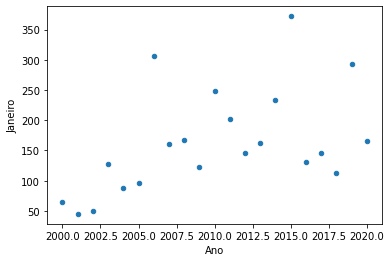

In [23]:
max_jan = df.max()["Janeiro"]
min_jan = df.min()["Janeiro"]
med_jan = df.mean()["Janeiro"]
desv_jan = df.std()["Janeiro"]
df.plot.scatter(x='Ano',y="Janeiro")
print(f"Maxímo: {max_jan} \nMínimo: {min_jan} \nMédia: {med_jan} \nDesvio: {desv_jan}")

In [24]:
hJaneiro = px.histogram(df,x='Janeiro')
hJaneiro.show()

In [25]:
px.box(df['Janeiro'])

#Fevereiro

Maxímo: 481.0 
Mínimo: 51.0 
Média: 228.14285714285714 
Desvio: 110.6441529021239


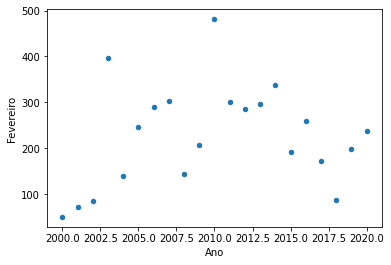

In [26]:
max_fev = df.max()["Fevereiro"]
min_fev = df.min()["Fevereiro"]
med_fev = df.mean()["Fevereiro"]
desv_fev = df.std()["Fevereiro"]
df.plot.scatter(x='Ano',y="Fevereiro")
print(f"Maxímo: {max_fev} \nMínimo: {min_fev} \nMédia: {med_fev} \nDesvio: {desv_fev}")

In [27]:
hFevereiro = px.histogram(df,x='Fevereiro')
hFevereiro.show()

In [28]:
px.box(df['Fevereiro'])

#Março

Maxímo: 591.0 
Mínimo: 50.0 
Média: 239.28571428571428 
Desvio: 114.86607108156126


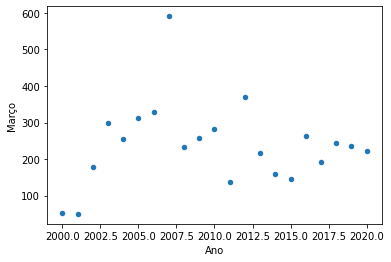

In [29]:
max_mar = df.max()["Março"]
min_mar = df.min()["Março"]
med_mar = df.mean()["Março"]
desv_mar = df.std()["Março"]
df.plot.scatter(x='Ano',y="Março")
print(f"Maxímo: {max_mar} \nMínimo: {min_mar} \nMédia: {med_mar} \nDesvio: {desv_mar}")

In [30]:
hMarco = px.histogram(df,x='Março')
hMarco.show()

In [31]:
px.box(df['Março'])

#Abril

Maxímo: 548.0 
Mínimo: 122.0 
Média: 298.42857142857144 
Desvio: 128.11384446209215


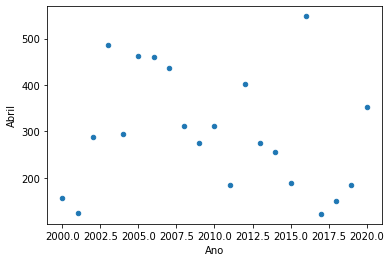

In [32]:
max_abr = df.max()["Abril"]
min_abr = df.min()["Abril"]
med_abr = df.mean()["Abril"]
desv_abr = df.std()["Abril"]
df.plot.scatter(x='Ano',y="Abril")
print(f"Maxímo: {max_abr} \nMínimo: {min_abr} \nMédia: {med_abr} \nDesvio: {desv_abr}")

In [33]:
hAbril = px.histogram(df,x='Abril')
hAbril.show()

In [34]:
px.box(df['Abril'])

#Maio

Maxímo: 1038.0 
Mínimo: 194.0 
Média: 482.57142857142856 
Desvio: 219.88851071135375


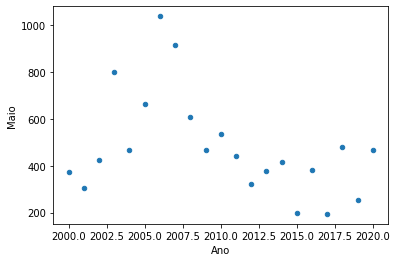

In [35]:
max_mai = df.max()["Maio"]
min_mai = df.min()["Maio"]
med_mai = df.mean()["Maio"]
desv_mai = df.std()["Maio"]
df.plot.scatter(x='Ano',y="Maio")
print(f"Maxímo: {max_mai} \nMínimo: {min_mai} \nMédia: {med_mai} \nDesvio: {desv_mai}")

In [36]:
hMaio = px.histogram(df,x='Maio')
hMaio.show()

In [37]:
px.box(df['Maio'])

#Junho

Maxímo: 2053.0 
Mínimo: 306.0 
Média: 777.0 
Desvio: 444.8569432975055


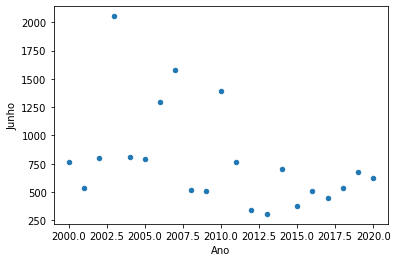

In [38]:
max_jun = df.max()["Junho"]
min_jun = df.min()["Junho"]
med_jun = df.mean()["Junho"]
desv_jun = df.std()["Junho"]
df.plot.scatter(x='Ano',y="Junho")
print(f"Maxímo: {max_jun} \nMínimo: {min_jun} \nMédia: {med_jun} \nDesvio: {desv_jun}")

In [39]:
hJunho = px.histogram(df,x='Junho')
hJunho.show()

In [40]:
px.box(df['Junho'])

#Julho

Maxímo: 2676.0 
Mínimo: 503.0 
Média: 1466.857142857143 
Desvio: 576.4014474057369


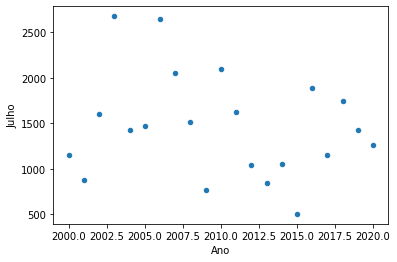

In [41]:
max_jul = df.max()["Julho"]
min_jul = df.min()["Julho"]
med_jul = df.mean()["Julho"]
desv_jul = df.std()["Julho"]
df.plot.scatter(x='Ano',y="Julho")
print(f"Maxímo: {max_jul} \nMínimo: {min_jul} \nMédia: {med_jul} \nDesvio: {desv_jul}")

In [42]:
hJulho = px.histogram(df,x='Julho')
hJulho.show()

In [43]:
px.box(df['Julho'])

#Agosto

Maxímo: 6472.0 
Mínimo: 941.0 
Média: 2748.4761904761904 
Desvio: 1313.6779140659867


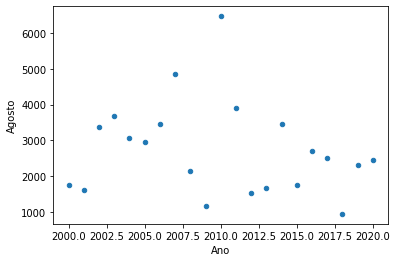

In [44]:
max_ago = df.max()["Agosto"]
min_ago = df.min()["Agosto"]
med_ago = df.mean()["Agosto"]
desv_ago = df.std()["Agosto"]
df.plot.scatter(x='Ano',y="Agosto")
print(f"Maxímo: {max_ago} \nMínimo: {min_ago} \nMédia: {med_ago} \nDesvio: {desv_ago}")

In [45]:
hAgosto= px.histogram(df,x='Agosto')
hAgosto.show()

In [46]:
px.box(df['Agosto'])

#Setembro

Maxímo: 9093.0 
Mínimo: 1684.0 
Média: 4562.857142857143 
Desvio: 2255.729755217018


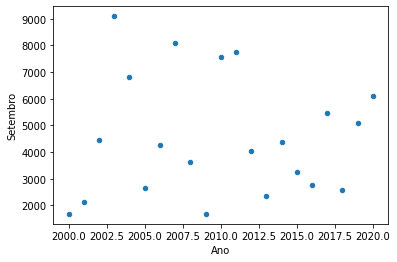

In [47]:
max_set = df.max()["Setembro"]
min_set = df.min()["Setembro"]
med_set = df.mean()["Setembro"]
desv_set = df.std()["Setembro"]
df.plot.scatter(x='Ano',y="Setembro")
print(f"Maxímo: {max_set} \nMínimo: {min_set} \nMédia: {med_set} \nDesvio: {desv_set}")

In [48]:
hSetembro = px.histogram(df,x='Setembro')
hSetembro.show()

In [49]:
px.box(df['Setembro'])

#Outubro

Maxímo: 7661.0 
Mínimo: 916.0 
Média: 3407.285714285714 
Desvio: 2123.5039708664817


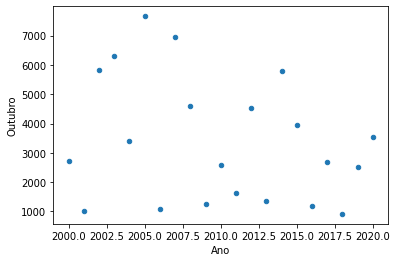

In [50]:
max_out = df.max()["Outubro"]
min_out = df.min()["Outubro"]
med_out = df.mean()["Outubro"]
desv_out = df.std()["Outubro"]
df.plot.scatter(x='Ano',y="Outubro")
print(f"Maxímo: {max_out} \nMínimo: {min_out} \nMédia: {med_out} \nDesvio: {desv_out}")

In [51]:
hOutubro = px.histogram(df,x='Outubro')
hOutubro.show()

In [52]:
px.box(df['Outubro'])

#Novembro

Maxímo: 2633.0 
Mínimo: 115.0 
Média: 681.2380952380952 
Desvio: 629.1395635915694


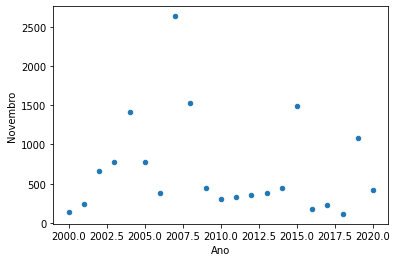

In [53]:
max_nov = df.max()["Novembro"]
min_nov = df.min()["Novembro"]
med_nov = df.mean()["Novembro"]
desv_nov = df.std()["Novembro"]
df.plot.scatter(x='Ano',y="Novembro")
print(f"Maxímo: {max_nov} \nMínimo: {min_nov} \nMédia: {med_nov} \nDesvio: {desv_nov}")

In [54]:
hNovembro = px.histogram(df,x='Novembro')
hNovembro.show()

In [55]:
px.box(df['Novembro'])

#Dezembro

Maxímo: 540.0 
Mínimo: 40.0 
Média: 245.04761904761904 
Desvio: 128.17116531828682


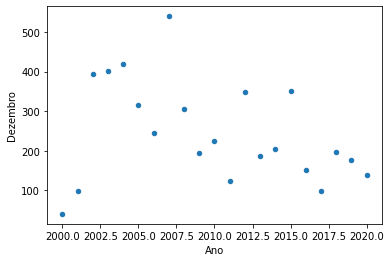

In [56]:
max_dez = df.max()["Dezembro"]
min_dez = df.min()["Dezembro"]
med_dez = df.mean()["Dezembro"]
desv_dez = df.std()["Dezembro"]
df.plot.scatter(x='Ano',y="Dezembro")
print(f"Maxímo: {max_dez} \nMínimo: {min_dez} \nMédia: {med_dez} \nDesvio: {desv_dez}")

In [57]:
hDezembro = px.histogram(df,x='Dezembro')
hDezembro.show()

In [58]:
px.box(df['Dezembro'])

#Gráfico do crescimento histórico Total e Gráfico Meses x N° de focos

In [59]:
soma_anos = df_transposta.sum()
figAnos = px.bar(soma_anos)
figAnos.update_layout(
    title = '',
    xaxis = dict(title='Anos'),
    yaxis = dict(title='Nº de focos de queimadas'),
    legend_title = 'Nº Focos',
    showlegend = False
)

max_anos = df_transposta.max()
figMaxAnos = px.line(max_anos)
figAnos.show()

In [60]:
grfBarra = go.Bar(
    x = df.columns[:-3], 
    y=df_transposta[2020] ,
    name = 'Ano 2020'
)
grfLinha1 = go.Scatter(
    x = df.columns[:-3], 
    y=df.max(),
    mode='lines+markers',
    name = 'Máximo'
)
grfLinha2 = go.Scatter(
    x = df.columns[:-3], 
    y=df.min(),
    mode='lines+markers',
    name = 'Mínimo'
)
grfLinha3 = go.Scatter(
    x = df.columns[:-3], 
    y=df.mean(),
    mode='lines+markers',
    name = 'Média'
)

dados = [grfBarra,grfLinha1,grfLinha2,grfLinha3]
layout = go.Layout(
    title = '',
    xaxis=dict(title='Meses'),
    yaxis=dict(title='Nº de focos de queimadas')
    
)

fig = go.Figure(data = dados, layout=layout)
fig.show()

#Correlações

In [61]:
df

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
2,65,51,52,156,374,763,1153,1745,1691,2714,144,40,8948,2000,745.666667
3,45,72,50,125,306,532,873,1603,2118,1022,237,99,7082,2001,590.166667
4,50,86,178,287,426,800,1601,3378,4458,5842,658,393,18157,2002,1513.083333
5,128,396,298,485,802,2053,2676,3680,9093,6317,780,402,27110,2003,2259.166667
6,88,141,254,295,469,808,1425,3059,6807,3403,1412,418,18579,2004,1548.250000
7,96,247,313,462,663,792,1473,2954,2669,7661,775,315,18420,2005,1535.000000
8,306,290,329,460,1038,1294,2646,3456,4263,1100,376,244,15802,2006,1316.833333
9,161,304,591,437,917,1575,2056,4861,8093,6948,2633,540,29116,2007,2426.333333
10,168,144,234,312,609,515,1518,2128,3626,4594,1533,305,15686,2008,1307.166667
11,122,207,258,274,467,509,769,1165,1684,1267,445,193,7360,2009,613.333333


In [62]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
Janeiro,1.000000,0.459485,0.113571,-0.005634,0.040106,0.058424,0.051721,0.229235,0.195763,-0.093446,0.207742,0.038990,0.148735,0.492009,0.148735
Fevereiro,0.459485,1.000000,0.472672,0.525980,0.381342,0.524770,0.428570,0.675219,0.567191,0.206258,0.031210,0.216791,0.580381,0.178288,0.580381
Março,0.113571,0.472672,1.000000,0.674060,0.640061,0.473904,0.496902,0.389498,0.411453,0.404288,0.550763,0.687191,0.604689,0.050931,0.604689
Abril,-0.005634,0.525980,0.674060,1.000000,0.647664,0.468775,0.583424,0.358032,0.241530,0.394708,0.203796,0.496607,0.498452,-0.138441,0.498452
Maio,0.040106,0.381342,0.640061,0.647664,1.000000,0.754199,0.777504,0.472892,0.363360,0.308845,0.334790,0.482725,0.594827,-0.401027,0.594827
Junho,0.058424,0.524770,0.473904,0.468775,0.754199,1.000000,0.817723,0.719925,0.702800,0.392800,0.298438,0.457282,0.810515,-0.426300,0.810515
Julho,0.051721,0.428570,0.496902,0.583424,0.777504,0.817723,1.000000,0.618163,0.568514,0.145419,0.093003,0.312827,0.631734,-0.220636,0.631734
Agosto,0.229235,0.675219,0.389498,0.358032,0.472892,0.719925,0.618163,1.000000,0.747480,0.342621,0.248568,0.334681,0.814019,-0.187618,0.814019
Setembro,0.195763,0.567191,0.411453,0.241530,0.363360,0.702800,0.568514,0.747480,1.000000,0.351147,0.364987,0.425675,0.856173,-0.003144,0.856173
Outubro,-0.093446,0.206258,0.404288,0.394708,0.308845,0.392800,0.145419,0.342621,0.351147,1.000000,0.550977,0.687976,0.705287,-0.276871,0.705287


In [63]:
corr_transposta = df_transposta.corr()
corr_transposta.style.background_gradient(cmap='coolwarm')

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2000,1.000000,0.816190,0.968999,0.863628,0.766351,0.929559,0.670218,0.888063,0.922752,0.898729,0.732710,0.637447,0.895023,0.827103,0.957154,0.862906,0.749181,0.785914,0.674835,0.769746,0.809288
2001,0.816190,1.000000,0.836840,0.920818,0.938603,0.592735,0.953098,0.901841,0.791669,0.966633,0.978494,0.949152,0.782057,0.980333,0.824185,0.748398,0.955280,0.949382,0.885391,0.945568,0.926366
2002,0.968999,0.836840,1.000000,0.920241,0.858374,0.929983,0.656208,0.955903,0.973739,0.929599,0.767660,0.713776,0.964552,0.881348,0.994530,0.949508,0.738496,0.865606,0.686419,0.851565,0.890985
2003,0.863628,0.920818,0.920241,1.000000,0.967248,0.736394,0.794599,0.961651,0.907195,0.968646,0.858050,0.889119,0.941482,0.942131,0.909361,0.885498,0.805348,0.974092,0.865666,0.966930,0.987837
2004,0.766351,0.938603,0.858374,0.967248,1.000000,0.622571,0.828286,0.957741,0.862884,0.956573,0.905085,0.948257,0.874616,0.965169,0.849416,0.862582,0.828593,0.987176,0.853257,0.995833,0.985138
2005,0.929559,0.592735,0.929983,0.736394,0.622571,1.000000,0.373155,0.807524,0.911905,0.746676,0.499714,0.409662,0.884370,0.655748,0.928105,0.884967,0.494445,0.629141,0.431292,0.611598,0.679624
2006,0.670218,0.953098,0.656208,0.794599,0.828286,0.373155,1.000000,0.739174,0.603028,0.864281,0.943034,0.917849,0.590221,0.897646,0.633414,0.525707,0.970630,0.850500,0.907645,0.848871,0.806909
2007,0.888063,0.901841,0.955903,0.961651,0.957741,0.807524,0.739174,1.000000,0.961653,0.969803,0.845364,0.837305,0.938611,0.939325,0.948257,0.957070,0.777878,0.938647,0.758351,0.949939,0.953609
2008,0.922752,0.791669,0.973739,0.907195,0.862884,0.911905,0.603028,0.961653,1.000000,0.911810,0.699200,0.682035,0.960199,0.848625,0.958808,0.977374,0.673867,0.842477,0.681176,0.857574,0.878088
2009,0.898729,0.966633,0.929599,0.968646,0.956573,0.746676,0.864281,0.969803,0.911810,1.000000,0.910833,0.891965,0.896202,0.975220,0.914967,0.868102,0.885865,0.956169,0.860134,0.956634,0.959056
